# CF Project 6.3: Geographical Visualizations with Python

## This script contains the following topics
### 01. Import Libraries and Data
### 02. Further Data Wrangling and Consistency Checks
### 03. Plotting a Choropleth
### 04.Saving and Exporting files
### Appendix

# 01. Import libraries and files

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# For matplotlib visuals to appear in the notebook without 'calling' for it
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\olufunsoo\Documents\CFProject'

In [31]:
# Import JSONfile as country_geo
country_geo = r'C:\Users\olufunsoo\Documents\CFProject\03 Scripts\us-states json file.json'

In [32]:
# Import data file as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Project_Data_Updated_0311.csv'), index_col = False)

In [33]:
# Checking output
country_geo

'C:\\Users\\olufunsoo\\Documents\\CFProject\\03 Scripts\\us-states json file.json'

In [13]:
# Check output
df.head()

,Unnamed: 0,Federal Provider Number,Provider Name,Provider State,Ownership Type,Number of Certified Beds,Number of Residents in Certified Beds,Provider Type,Provider Resides in Hospital,Date First Approved to Provide Medicare and Medicaid services,...,Cycle 3 Number of Health Revisits,Cycle 3 Health Revisit Score,Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Total Number of Penalties,Processing Date,Nursing Home Age,STATE
0,0,15019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,AL,For profit - Corporation,124,102,Medicare and Medicaid,False,1974-01-01,...,1.0,0.0,24.0,22.667,0,1,1,2016-09-01,15584 days,Alabama
1,1,15113,RIVER CITY CENTER,AL,For profit - Corporation,183,168,Medicare and Medicaid,False,1969-10-08,...,1.0,0.0,40.0,48.667,0,3,1,2016-09-01,17130 days,Alabama
2,2,15112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,AL,For profit - Corporation,77,77,Medicare and Medicaid,False,1975-09-01,...,1.0,0.0,16.0,15.333,0,0,0,2016-09-01,14976 days,Alabama
3,3,15114,SHADESCREST HEALTH CARE CENTER,AL,For profit - Corporation,107,96,Medicare and Medicaid,False,1970-12-29,...,1.0,0.0,52.0,25.333,0,3,1,2016-09-01,16683 days,Alabama
4,4,15123,WASHINGTON COUNTY NURSING HOME,AL,Government - County,88,81,Medicare and Medicaid,True,1975-01-01,...,1.0,0.0,20.0,13.333,0,0,0,2016-09-01,15219 days,Alabama


In [14]:
df.shape

(15050, 47)

In [15]:
df.columns

Index(['Unnamed: 0', 'Federal Provider Number', 'Provider Name',
       'Provider State', 'Ownership Type', 'Number of Certified Beds',
       'Number of Residents in Certified Beds', 'Provider Type',
       'Provider Resides in Hospital',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Facility',
       'Provider Changed Ownership in Last 12 Months',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'RN Staffing Rating',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Adjusted CNA Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
     

# 02. Data Wrangling and Consistency Checks

In [16]:
# Creating subset for the variables necessary for the Geospatial analysis
df_geo = df[['Federal Provider Number', 'STATE', 'Number of Certified Beds', 'Number of Residents in Certified Beds', 'Overall Rating', 'Staffing Rating']]

In [17]:
# Checking output
df_geo.head()

,Federal Provider Number,STATE,Number of Certified Beds,Number of Residents in Certified Beds,Overall Rating,Staffing Rating
0,15019,Alabama,124,102,4.0,4.0
1,15113,Alabama,183,168,1.0,3.0
2,15112,Alabama,77,77,5.0,4.0
3,15114,Alabama,107,96,4.0,5.0
4,15123,Alabama,88,81,4.0,4.0


##### Extreme Value Check

<Axes: xlabel='Number of Certified Beds', ylabel='Count'>

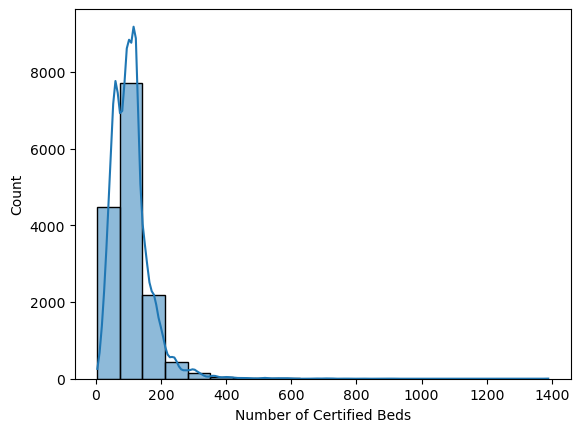

In [18]:
# Checking for extreme value in 'Number of Certified Beds'
sns.histplot(df_geo['Number of Certified Beds'], bins=20, kde = True)

In [19]:
# Check how many extreme values

df_geo[df_geo['Number of Certified Beds'] > 800] # Google research shows the highest number of certified beds in 2022 was 874 beds

,Federal Provider Number,STATE,Number of Certified Beds,Number of Residents in Certified Beds,Overall Rating,Staffing Rating
718,395780,Pennsylvania,908,747,1.0,4.0
7656,335462,New York,816,725,5.0,1.0
8818,335092,New York,1389,159,5.0,5.0


##### These records will be left as there is the possibility of nursing homes have these values of certified beds

<Axes: xlabel='Overall Rating', ylabel='Count'>

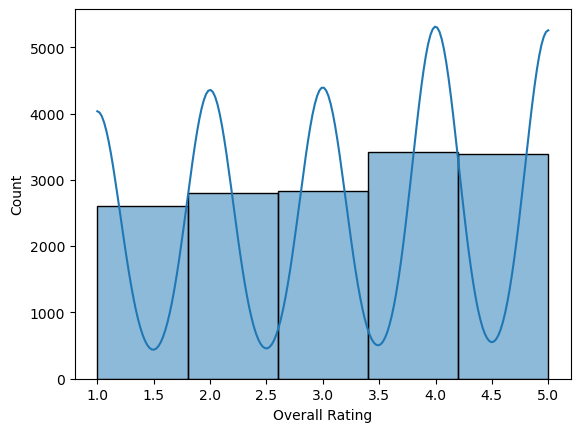

In [24]:
# Check the rating variables

sns.histplot(df_geo['Overall Rating'], bins=5, kde = True)

<Axes: xlabel='Staffing Rating', ylabel='Count'>

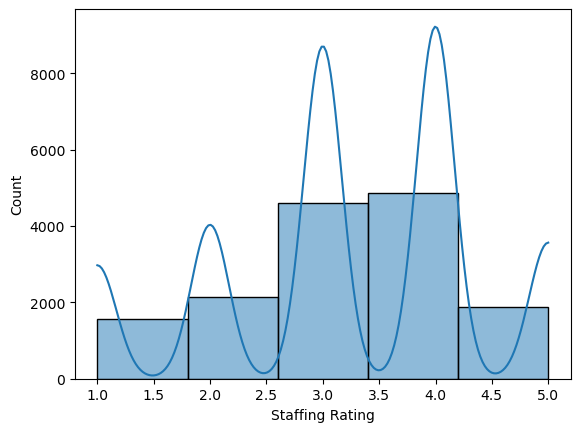

In [23]:
sns.histplot(df_geo['Staffing Rating'], bins=5, kde = True)

# 03. Plotting a Choropleth

In [26]:
# Create a data frame with just the states and the values for rating to be plotted

data_to_plot = df_geo[['STATE','Overall Rating']]
data_to_plot.head()

,STATE,Overall Rating
0,Alabama,4.0
1,Alabama,1.0
2,Alabama,5.0
3,Alabama,4.0
4,Alabama,4.0


In [25]:
# Create the base map
map = folium.Map(location=[40, -95], zoom_start=4)

In [34]:
# Create a Choropleth layer
folium.Choropleth(
geo_data=country_geo,
data=data_to_plot,
columns=['STATE', 'Overall Rating'],
key_on='feature.properties.name',
fill_color='YlOrBr',
fill_opacity=0.6,
line_opacity=0.1,
legend_name="Rating"
).add_to(map)

In [35]:
# Add a GeoJson layer for state labels
folium.GeoJson(
country_geo,
name='state_labels',
style_function=lambda x: {'color': 'transparent', 'fillColor': 'transparent'},
highlight_function=lambda x: {'weight': 1, 'fillColor': 'transparent'},
tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['State'], labels=True, sticky=True)
).add_to(map)

In [36]:
# Add a layer control to toggle the layers on and off
folium.LayerControl().add_to(map)

In [37]:
# Display the map
map

# 04. Saving and Exporting files

In [38]:
# Save map
map.save('plot_data.html')

## Appendix
#### Majority of the states in the US have nursing homes with good overall ratings, with scores between 3.0 and 5.0. 
#### However, The following states are shown by the map to have nursing homes with poor overall ratings : Oregon, Montana, South Dakota, Utah, Texas, Alabama, Florida, Virginia, New Hampshire and New Jersey.
#### This analysis answers the question "2.	Which states have nursing homes with good ratings? (and vice versa)."
#### The states with the lowest overall rating seem to be big state. So it leads to the question "Does the size of a state have any impact on the the overall rating of a nursing home? Is there a relationship between the size of a state and the rating of the nursing homes in the respective state?